<a href="https://colab.research.google.com/github/Kimyongju40/Kim.github.io/blob/main/n122a_CLT_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 2*

# 📝 Assignment

# **🌱 기본 과제**

## **Part 1. 데이터셋 불러오기**

- 서울시 기간별 시간평균 대기환경 정보 데이터셋을 불러오세요. 
  - 다음 [링크](https://data.seoul.go.kr/dataList/OA-2221/S/1/datasetView.do)에서 `2020년 3월`의 데이터셋을 다운받으세요. 
- 불러온 데이터셋을 변수 `data`에 저장하세요.
  - 한글 데이터이므로 `encoding` 파라미터 설정이 필요합니다. 
  - `측정일시`, `측정소명`, `오존(ppm)` column만 사용합니다. column을 추출하는 방법은 여러 가지가 있는데, 이번에는 `usecols` 파라미터를 한번 사용해 보세요. 
- `data`에서 `측정소명`이 **`송파구`**인 데이터를 추출하여 `df`에 저장하세요. 
- `df`의 index를 재설정 하세요.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [8]:
#데이터 업로드
from google.colab import files
files.upload()

Saving 서울시_기간별_시간평균_대기환경_정보_2020.03.csv to 서울시_기간별_시간평균_대기환경_정보_2020.03.csv


{'서울시_기간별_시간평균_대기환경_정보_2020.03.csv': b'"\xc3\xf8\xc1\xa4\xc0\xcf\xbd\xc3","\xb1\xc7\xbf\xaa\xc4\xda\xb5\xe5","\xb1\xc7\xbf\xaa\xb8\xed","\xc3\xf8\xc1\xa4\xbc\xd2\xc4\xda\xb5\xe5","\xc3\xf8\xc1\xa4\xbc\xd2\xb8\xed","\xb9\xcc\xbc\xbc\xb8\xd5\xc1\xf6 1\xbd\xc3\xb0\xa3(\xa7\xb6/\xa7\xa9)","\xb9\xcc\xbc\xbc\xb8\xd5\xc1\xf6 24\xbd\xc3\xb0\xa3(\xa7\xb6/\xa7\xa9)","\xc3\xca\xb9\xcc\xbc\xbc\xb8\xd5\xc1\xf6(\xa7\xb6/\xa7\xa9)","\xbf\xc0\xc1\xb8(ppm)","\xc0\xcc\xbb\xea\xc8\xad\xc1\xfa\xbc\xd2\xb3\xf3\xb5\xb5(ppm)","\xc0\xcf\xbb\xea\xc8\xad\xc5\xba\xbc\xd2\xb3\xf3\xb5\xb5(ppm)","\xbe\xc6\xc8\xb2\xbb\xea\xb0\xa1\xbd\xba\xb3\xf3\xb5\xb5(ppm)"\r\n"202003312300","100","\xb5\xb5\xbd\xc9\xb1\xc7","111123","\xc1\xbe\xb7\xce\xb1\xb8","47","48","22","0.036","0.018","0.4","0.004"\r\n"202003312300","100","\xb5\xb5\xbd\xc9\xb1\xc7","111131","\xbf\xeb\xbb\xea\xb1\xb8","55","52","21","0.024","0.033","0.5","0.003"\r\n"202003312300","100","\xb5\xb5\xbd\xc9\xb1\xc7","111121","\xc1\xdf\xb1\xb8","43","43","24","0.03

In [13]:
data = pd.read_csv('서울시_기간별_시간평균_대기환경_정보_2020.03.csv', encoding='cp949', usecols=['측정일시', '측정소명', '오존(ppm)'])
data.head()

,측정일시,측정소명,오존(ppm)
0,202003312300,종로구,0.036
1,202003312300,용산구,0.024
2,202003312300,중구,0.034
3,202003312300,은평구,0.047
4,202003312300,서대문구,0.047


##### **Q1. `df`의 row는 모두 몇 개인지 쓰세요.**

In [14]:
df = data[data['측정소명'] == '송파구']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 24 to 18599
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   측정일시     744 non-null    int64  
 1   측정소명     744 non-null    object 
 2   오존(ppm)  744 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.2+ KB


## **Part 2. 큰 수의 법칙**

표본 크기가 커질수록 표본평균이 모평균에 가까워지는 것을 확인합니다. 

### **2-1. 모평균**
- `df['오존(ppm)']`을 추출하여 변수 `pop`에 저장합니다. 우리는 `pop`을 모집단이라 가정한 뒤 분석을 진행합니다. 
- 모평균을 `pop_mean`에 저장하세요. 

##### **Q2. 모평균을 반올림하여 소수점 둘째 자리까지 쓰세요.**

In [15]:
df.head()

,측정일시,측정소명,오존(ppm)
24,202003312300,송파구,0.020
49,202003312200,송파구,0.021
73,202003312100,송파구,0.025
99,202003312000,송파구,0.032
124,202003311900,송파구,0.034


In [16]:
pop = df['오존(ppm)']

In [20]:
pop.head()

24     0.020
49     0.021
73     0.025
99     0.032
124    0.034
Name: 오존(ppm), dtype: float64

In [29]:
pop_mean = pop.mean()
round(pop_mean,2)

0.02

### **2-2. 표본 크기에 따른 표본 평균**
- 모집단에서 10개의 데이터를 추출하여 평균을 `sample_10_mean`에 저장하세요.
- 모집단에서 200개의 데이터를 추출하여 평균을 `sample_200_mean`에 저장하세요. 
- 데이터를 추출할 때, [`.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) 함수를 활용하세요. 
  - `random_state=2`로 설정합니다. 
  - 중복 추출을 허용합니다. 

##### **Q3. 모평균과 표본 크기가 10인 표본의 평균의 차의 절댓값을 $a$, 모평균과 표본 크기가 200인 표본의 평균의 차의 절댓값을 $b$라 할 때, $a \over b$의 값을 반올림하여 소수점 둘째 자리까지 구하세요.**

In [17]:
# 모집단에서 각각 10개, 200개의 데이터를 랜덤으로 추출
sample_10 = pop.sample(10, random_state=2, replace=True)
sample_200 = pop.sample(200, random_state=2, replace=True)

In [31]:
# 10개 데이터의 평균
sample_10_mean = sample_10.mean()
a = abs(pop_mean - sample_10_mean)
a

0.002011290322580645

In [32]:
# 200개 데이터의 평균 
sample_200_mean = sample_200.mean()
b = abs(pop_mean - sample_200_mean)
b

0.00014629032258064306

In [33]:
round(a/b,2)

13.75

### **2-3. 시각화**
- 다음 시각화를 구현하세요.  <br>
  <img src = 'https://i.imgur.com/cC8DaP1.png'>

##### **Q4. 주어진 시각화와 같이 히스토그램을 나타내려고 합니다. `plt.hist()`를 활용할 때, `()`안에 들어갈 인자는 무엇일까요?**
- 모집단의 데이터 분포
- 표본 크기가 10인 표본의 데이터 분포
- 표본 크기가 200인 표본의 데이터 분포 
- 표본 크기가 10인 표본의 평균의 분포
- 표본 크기가 200인 표본의 평균의 분포 

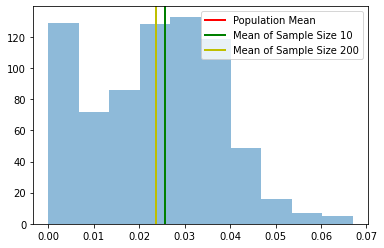

In [38]:
#그래프에서 히스토그램으로 나타낸 분포는 모집단의 데이터입니다.
plt.hist(pop, alpha=0.5)
plt.axvline(pop_mean, c='r', lw=2, label='Population Mean')
plt.axvline(sample_10_mean, c='g', lw=2, label='Mean of Sample Size 10')
plt.axvline(sample_200_mean, c='y', lw=2, label='Mean of Sample Size 200')
plt.legend()

## **Part 3. 중심극한정리**

표본들의 평균 분포가 정규분포를 이루는지 다음 순서에 따라 확인합니다.  

1. numpy의 `random.choice()` 함수를 활용하여 `df['오존(ppm)']`에서 20개의 데이터를 추출합니다.
  - 중복 추출을 허용합니다. 
2. 20개의 데이터의 평균을 계산하여 리스트 `s1`에 저장합니다. 
3. 1~2 과정을 `for loop`을 이용하여 10,000번 반복합니다. 즉, `s1`에는 10,000번 추출된 20개의 데이터의 평균값이 저장됩니다. 
4. 평균값들의 분포를 `seaborn.kdeplot()`을 활용하여 시각화 하세요. <br>
  https://seaborn.pydata.org/generated/seaborn.kdeplot.html

##### **Q5. 평균 값들의 분포를 시각화한 결과는 어떤 모습일까요?**

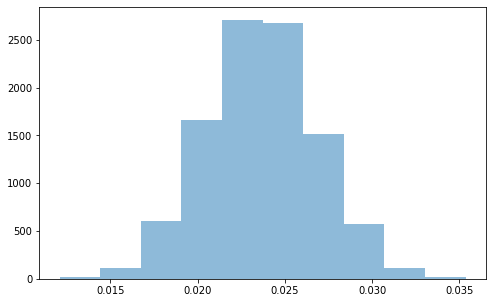

In [49]:
s1 = []

for _ in range(10000):
  sample = np.random.choice(pop, 20, replace=True)
  s1.append(sample.mean())

plt.figure(figsize=(8,5))
plt.hist(s1, alpha=0.5);

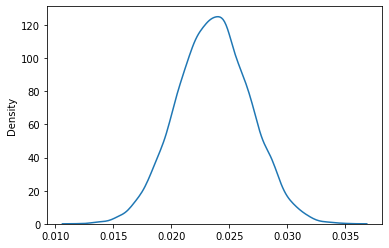

In [55]:
sns.kdeplot(s1)

## **Part 4. 신뢰구간**
**Part 3** 에서 빌드한 표본 평균 분포에 대하여 모집단의 모수를 포함할 확률이 95%가 되는 구간을 시각화합니다. 
- 표본 평균의 평균은 초록 세로선으로, 신뢰구간 95% 구간은 빨간 세로선으로 나타내세요. 

##### **Q6. 95% 신뢰구간을 시각화한 결과는 어떤 모습일까요?**

In [62]:
low, up = np.percentile(s1, 2.5), np.percentile(s1, 97.5)
low, up

(0.017450000000000004, 0.029800000000000004)

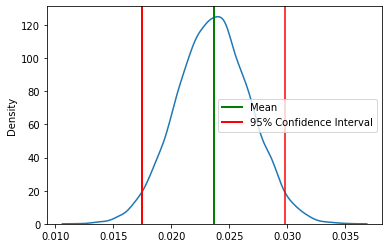

In [63]:
sns.kdeplot(s1)
plt.axvline(np.array(s1).mean(), c='g', lw=2, label='Mean')
plt.axvline(low, c='r', lw=2, label='95% Confidence Interval')
plt.axvline(up, c='r')
plt.legend();

# **🥇 도전 과제**

> 2번에서 구한 두 표본 sample_10, sample_200을 계속 사용합니다.

</br>

- 한 표본의 신뢰구간을 수학적으로 다음 식과 같이 나타낼 수 있습니다. 
  > $\bar{x} ± t \cdot {s\over \sqrt{n}}$
  - $\bar{x}$ : 표본의 평균
  - $t$ : t-value <br>
    - [stats.t.ppf()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) 메소드를 활용해 구할 수 있습니다. 신뢰도(confidence level)는 95%로 합니다. 
    - 다음 [stackoverflow](https://stackoverflow.com/questions/67340028/how-to-use-t-ppf-which-are-the-arguments)를 참고하세요. 
  - $s$ : 표본의 표준편차
  - $n$ : 데이터 수 

- **신뢰구간 식과 `plt.bar()`를 사용하여 다음과 같은 신뢰구간 시각화를 그리세요.**

  <img src = 'https://i.imgur.com/MpDSFtn.png'>

- **위의 시각화로부터 도출할 수 있는 insight를 설명해 보세요.** 

In [ ]:
# 이곳에 코드를 작성하세요.